In [1]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.utils import shuffle
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

Matplotlib is building the font cache using fc-list. This may take a moment.


0.0


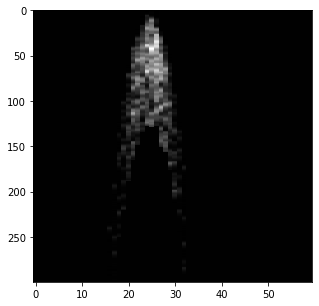

In [2]:
nu_size = 2402105
nu_data = np.memmap('/fastio2/dasha/double_pulse/nu_data_qs5000_qt10000.npy', mode = 'r', dtype ='float32', shape = (nu_size,300,60))
nu_labels = np.memmap('/fastio2/dasha/double_pulse/nu_label_qs5000_qt10000.npy', mode = 'r', dtype ='float32', shape = nu_size)
nu_info = np.memmap('/fastio2/dasha/double_pulse/nu_info_qs5000_qt10000.npy', mode = 'r', dtype ='float32', shape = (nu_size,3))

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.imshow(nu_data[0], interpolation='nearest', aspect='auto', cmap= 'gray')
print(nu_labels[0])

In [4]:
def MakeImg(i, title, x = 0.4,y =0.5):
    fig = plt.figure(figsize=(5, 5),facecolor='w')
    ax = fig.add_subplot(111)
    img = nu_data[i].copy()
    img_max = np.max(img)
    img[img<0] = 0
    img = img / img_max /1.1+ 0.01
    ax.set_title(title, fontsize = 14)
    im = ax.imshow(img, interpolation='nearest', aspect='auto', cmap= 'inferno',norm=LogNorm(vmin= img.min(), vmax= img.max()))
    ax.set_xlabel("DOM#", fontsize = 14)
    ax.set_ylabel("Time, bins", fontsize = 14)
    name = "Nu Energy = {0:.0f} GeV\nQt = {1:.0f} PE\nQs = {2:.0f} PE".format(nu_info[i][0],nu_info[i][1],nu_info[i][2])
    ax.text(x,y, name, transform=ax.transAxes, color = "white",fontsize=12)
    im.set_clim(0.01,1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')
    #plt.title("Label = {0:.0f}, En = {1:.0f} GeV, Qt = {2:.0f} PE, Qs = {3:.0f} PE, i = {4}".format(nu_labels[i], nu_info[i][0],nu_info[i][1],nu_info[i][2],i))


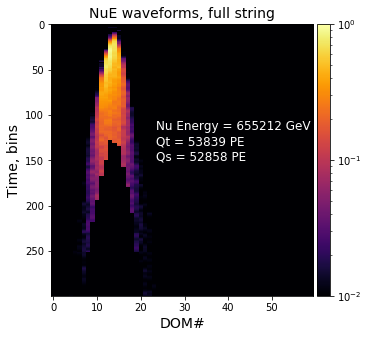

In [5]:
MakeImg(39, "NuE waveforms, full string")

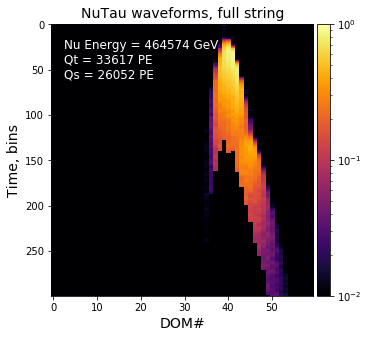

In [6]:
MakeImg(2100022,"NuTau waveforms, full string", x = 0.05, y = 0.8)

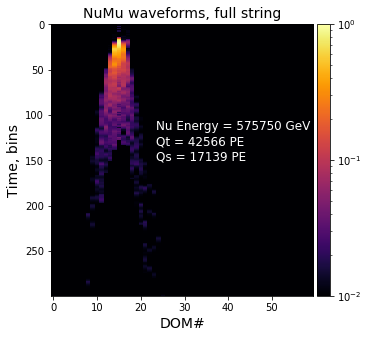

In [7]:
MakeImg(1400028,"NuMu waveforms, full string")

In [103]:
#for i in range(1400000,1400100):
#    MakeImg(i)

In [263]:
def Plot(i, j, n, title, pos = 0.75, color = 'k'):
    plt.rcParams['axes.facecolor']='white'
    name = "Nu Energy = {0:.0f} GeV\nQevent = {1:.0f} PE\nQstring = {2:.0f} PE".format(nu_info[i][0],nu_info[i][1],nu_info[i][2])
    img = nu_data[i].copy()
    img[img<0] = 0
    img = img / 10**(-12)
    fig = plt.figure(figsize=(5, 5),facecolor='w')
    ax = fig.add_subplot(111)
    ax.set_title(title, fontsize = 14)
    ax.text(0.4,pos, name, transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_xlabel("Time, bins", fontsize = 14)
    ax.set_xlim(0,200)
   # plt.set_axis_bgcolor('white')
    ax.set_ylabel("Amplitude, mV", fontsize = 14)                                                   
    for k in range(j,j+n):
        ax.plot(img[:,k], c = tuple(color), lw =2, label = 'DOM#{0:2d}'.format(k))  
        color[3] = color[3]-1/n 
    plt.legend()   

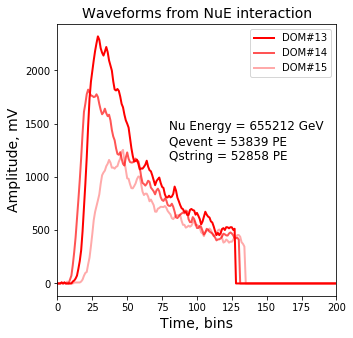

In [267]:
Plot(39, 13, 3,"Waveforms from NuE interaction", 0.5, color = ([1,0,0,1]))

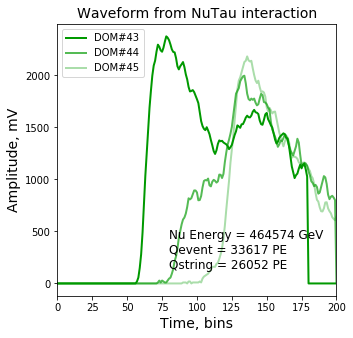

In [271]:
Plot(2100022,43,3,"Waveform from NuTau interaction", 0.1, color = ([0,0.6,0,1]))

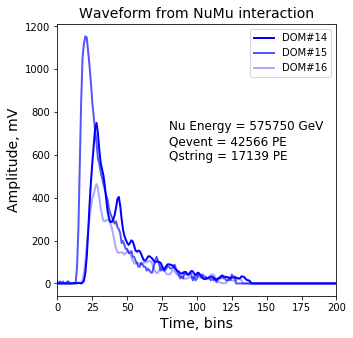

In [269]:
Plot(1400028,14,3,"Waveform from NuMu interaction", 0.5, color = ([0,0,1,1]))